# TSPデータ作成

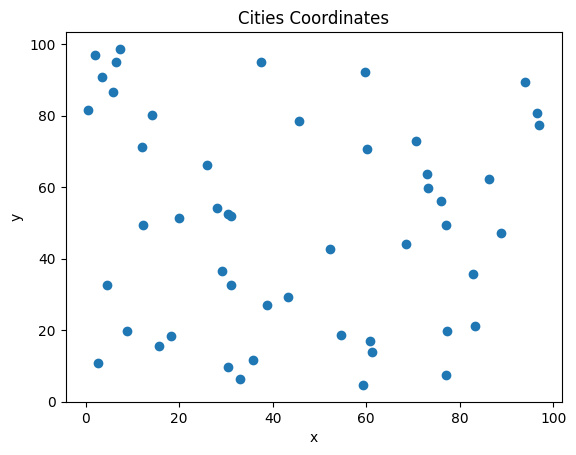

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 都市の数を設定
num_cities = 50

# ランダムな都市の座標を生成
np.random.seed(42)
cities = np.random.rand(num_cities, 2) * 100

# データセットを表示
plt.scatter(cities[:, 0], cities[:, 1])
plt.title('Cities Coordinates')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 貪欲法

In [2]:
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

In [3]:
def visualize(cities, order, total_distance):
    plt.figure(figsize=(10, 5))
    plt.plot(cities[order][:, 0], cities[order][:, 1], 'o-')
    plt.plot([cities[order[-1]][0], cities[order[0]][0]],
             [cities[order[-1]][1], cities[order[0]][1]], 'o-')
    for i, city in enumerate(order):
        plt.text(cities[city][0], cities[city][1],
                 str(i), fontsize=12, ha='right')
    plt.title('Total distance: {:.2f}'.format(total_distance))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [4]:
def total_distance(cities, order):
    total_distance = 0
    for i in range(len(order)-1):
        total_distance += distance(cities[order[i]], cities[order[i+1]])
    return total_distance

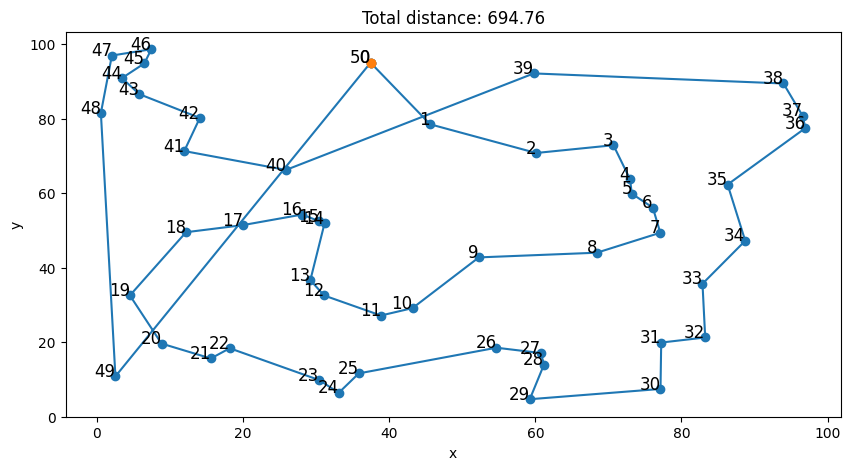

In [5]:
current_city = 0
visited = [current_city]

# 仮にN=30だったら、30-1=29回ループして残りの都市を巡る
for i in range(num_cities-1):
    next_city = np.argmin([distance(cities[current_city], city)
                          if i not in visited else 10**6
                          for i, city in enumerate(cities)])
    visited.append(next_city)
    current_city = next_city
visited.append(visited[0])
visualize(cities, visited, total_distance(cities, visited))

# 局所探索法(2-opt)

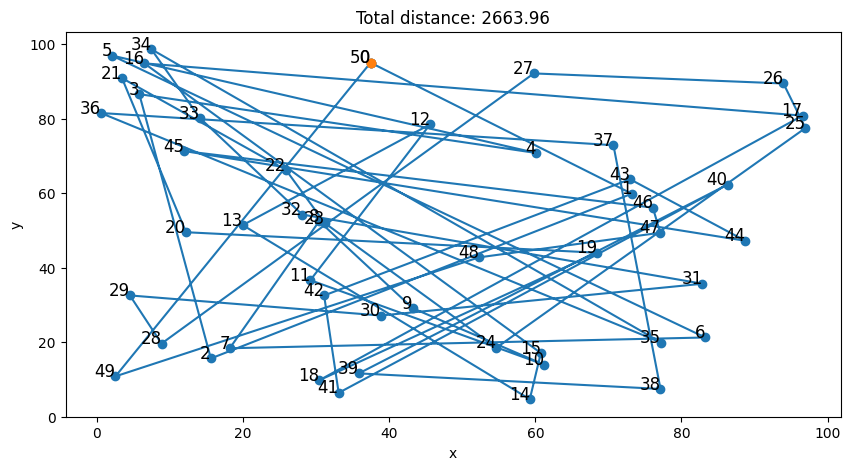

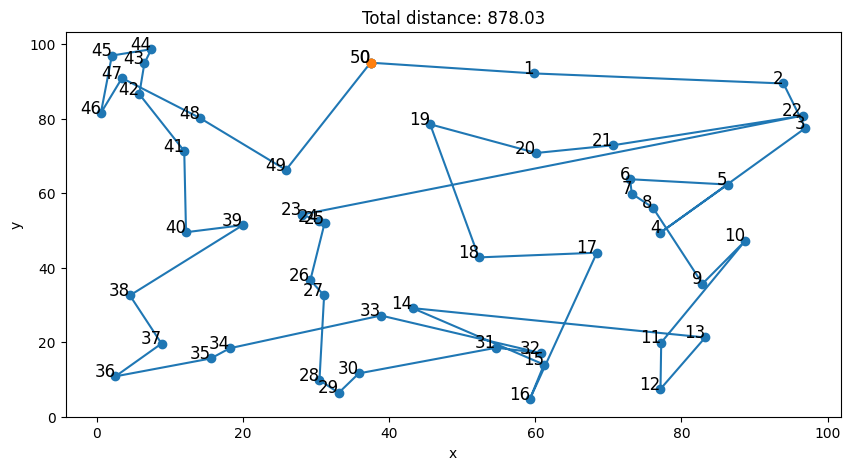

In [6]:
# 初期解を生成
order = np.append(np.arange(num_cities), 0)
current_total_distance = total_distance(
    cities, order)
visualize(cities, order, current_total_distance)

# 近傍解を生成
for i in range(1000):
    new_order = order.copy()
    # ランダムに反転させる区間を決定
    L = np.random.randint(1, num_cities)
    R = np.random.randint(L, num_cities)
    # 区間を反転
    new_order[L:R+1] = new_order[L:R+1][::-1]
    # 新しい解を評価
    new_total_distance = total_distance(
        cities, new_order)
    # 新しい解が良ければ採用
    if new_total_distance < current_total_distance:
        order = new_order
        current_total_distance = new_total_distance
visualize(cities, order, current_total_distance)

# 焼きなまし法

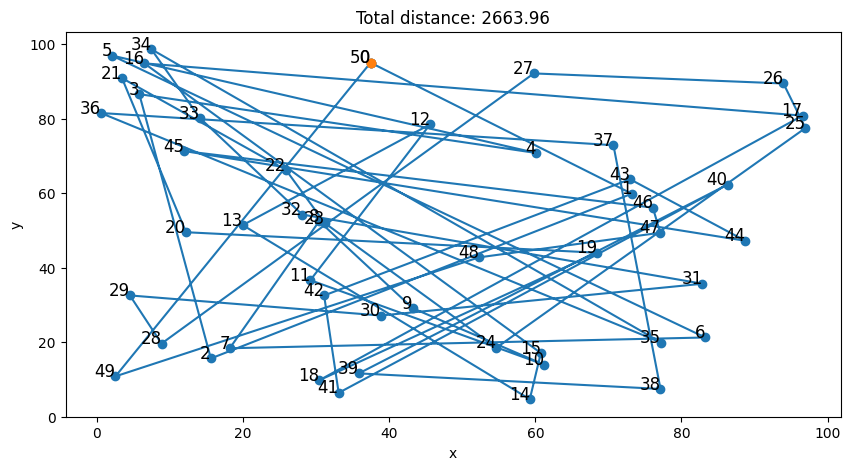

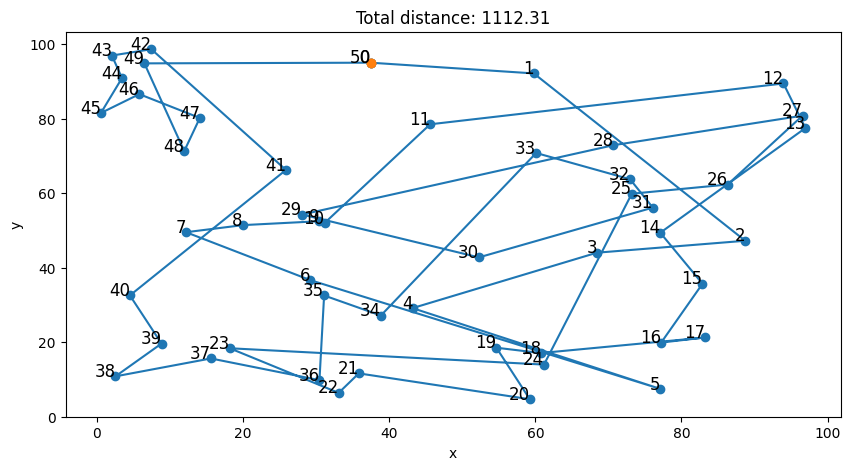

In [7]:
# 初期解
order = np.append(np.arange(num_cities), 0)
current_total_distance = total_distance(cities, order)
visualize(cities, order, current_total_distance)
# 2-opt
for i in range(1000):
    new_order = order.copy()
    # ランダムに反転させる区間を決定
    L = np.random.randint(1, num_cities)
    R = np.random.randint(L, num_cities)
    # 区間を反転
    new_order[L:R+1] = new_order[L:R+1][::-1]
    # 新しい解を評価
    new_total_distance = total_distance(
        cities, new_order)
    # 近傍解が悪くても確率で採用
    t = 30 - 28 * i / 1000
    # new_total_distance - current_total_distance がマイナスの場合、
    # expの値が1より大きくなり必ず採用される
    prob = np.exp(-(new_total_distance - current_total_distance) / t)
    if np.random.rand() < prob:
        order = new_order
        current_total_distance = new_total_distance
visualize(cities, order, current_total_distance)

# GRASP(Greedy Randomized Adaptive Search Procedure)法

* ランダム化貪欲法によって得られた初期解に対して局所探索をしていく。

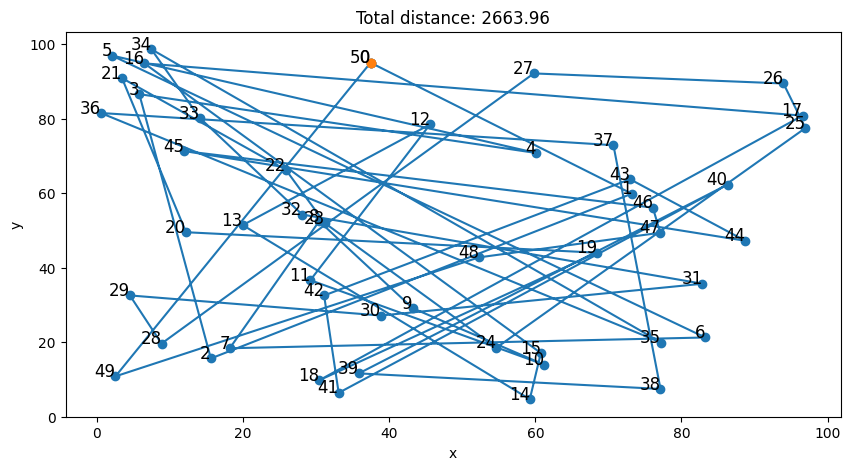

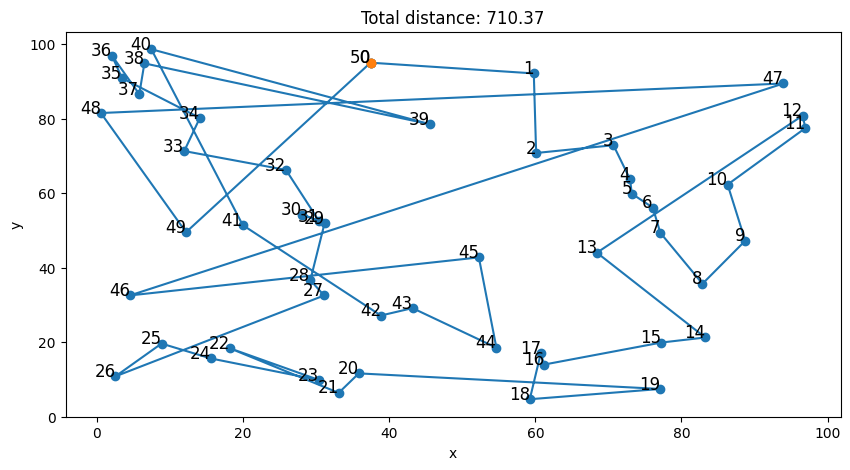

In [8]:
# 初期解
order = np.append(np.arange(num_cities), 0)
current_total_distance = total_distance(cities, order)
visualize(cities, order, current_total_distance)

for _ in range(300):
    # ランダム化貪欲法
    k = 3
    current_city = 0
    visited = [current_city]
    for i in range(num_cities-1):
        # 未訪問の都市の中で最も近い都市をk個選択
        if num_cities - i <= k:
            k = num_cities - i - 1
        next_cities = np.argsort([distance(cities[current_city], city)
                                  if i not in visited else float("inf")
                                  for i, city in enumerate(cities)])[:k]
        # その中からランダムに選択
        next_city = np.random.choice(next_cities)
        visited.append(next_city)
        current_city = next_city
    visited.append(visited[0])

    # 2-opt
    order = visited
    for i in range(1000):
        new_order = order.copy()
        # ランダムに反転させる区間を決定
        L = np.random.randint(1, num_cities)
        R = np.random.randint(L, num_cities)
        # 区間を反転
        new_order[L:R+1] = new_order[L:R+1][::-1]
        # 新しい解を評価
        new_total_distance = total_distance(cities, new_order)
        # 新しい解が良ければ採用
        if new_total_distance < current_total_distance:
            order = new_order
            current_total_distance = new_total_distance

visualize(cities, order, current_total_distance)

# 反復局所探索法

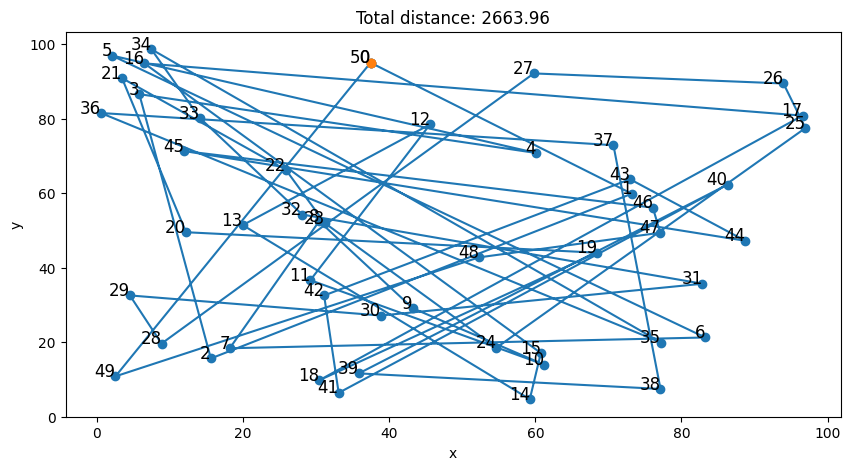

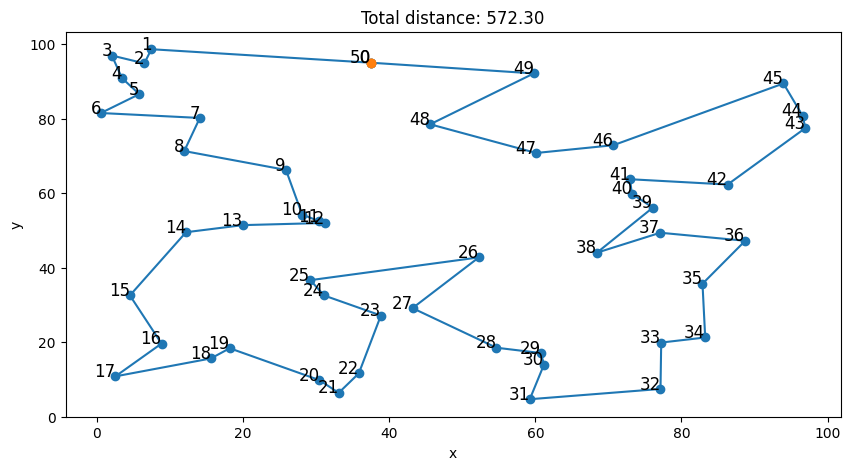

In [9]:
# 初期解
order = np.append(np.arange(num_cities), 0)
current_total_distance = total_distance(cities, order)
visualize(cities, order, current_total_distance)

# 2-opt
for i in range(1000):
    new_order = order.copy()
    # ランダムに反転させる区間を決定
    L = np.random.randint(1, num_cities)
    R = np.random.randint(L, num_cities)
    # 区間を反転
    new_order[L:R+1] = new_order[L:R+1][::-1]
    # 新しい解を評価
    new_total_distance = total_distance(cities, new_order)
    # 新しい解が良ければ採用
    if new_total_distance < current_total_distance:
        order = new_order
        current_total_distance = new_total_distance

for _ in range(100):
    # ランダムに都市を入れ替え
    new_order = order.copy()
    i, j = np.random.choice(num_cities, 2, replace=False)
    new_order[i], new_order[j] = new_order[j], new_order[i]
    # 2-opt
    for i in range(1000):
        new_order = order.copy()
        # ランダムに反転させる区間を決定
        L = np.random.randint(1, num_cities)
        R = np.random.randint(L, num_cities)
        # 区間を反転
        new_order[L:R+1] = new_order[L:R+1][::-1]
        # 新しい解を評価
        new_total_distance = total_distance(cities, new_order)
        # 新しい解が良ければ採用
        if new_total_distance < current_total_distance:
            order = new_order
            current_total_distance = new_total_distance
visualize(cities, order, current_total_distance)

# GUIDED LOCAL SEARCH

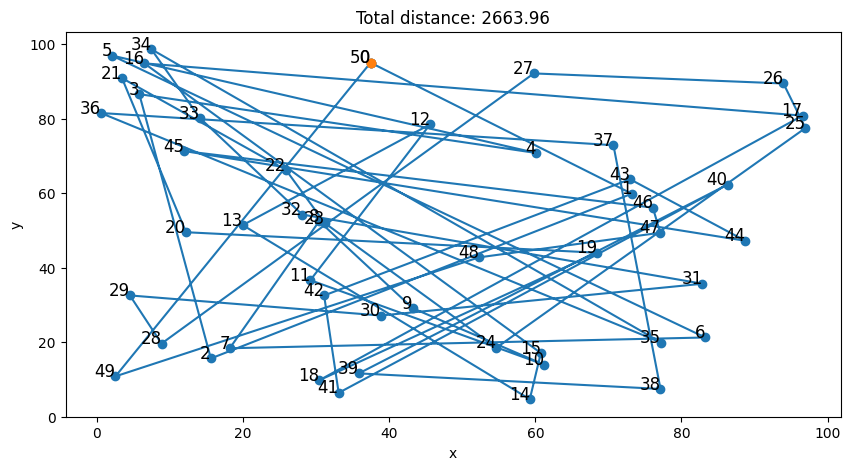

In [14]:
# 初期解
order = np.append(np.arange(num_cities), 0)
current_total_distance = total_distance(cities, order)
visualize(cities, order, current_total_distance)

In [15]:
def gls_total_distance(cities, order, penalties, lambda_):
    """ ペナルティ付き総距離の計算 """
    cost = 0
    for i in range(len(order) - 1):
        u, v = order[i], order[i + 1]
        # 通過した都市間の距離 + ペナルティ
        # ペナルティの中身は def penalties(cities, order): で計算
        cost += distance(cities[u], cities[v]) + lambda_ * penalties[u, v]
    return cost

In [ ]:
def update_penalties(order, penalties):
    """ 頻繁に使われるエッジにペナルティを追加 """
    max_utility = -1
    best_edges = []

    for i in range(len(order) - 1):
        u, v = order[i], order[i + 1]
        # ユーティリティの計算
        # 距離が長いほどユーティリティは高くなる
        # ただしペナルティを加えるとユーティリティは低くなる
        # → 「距離が長いのに、まだあまりペナルティが加えられていないエッジ」が選ばれやすい
        utility = distance(cities[u], cities[v]) / (1 + penalties[u, v])

        if utility > max_utility:
            max_utility = utility
            best_edges = [(u, v)]
        elif utility == max_utility:
            best_edges.append((u, v))

    # 距離が長い割にペナルティが低いエッジにペナルティを付加
    for (u, v) in best_edges:
        penalties[u, v] += 1
        penalties[v, u] += 1  # 対称性を保持

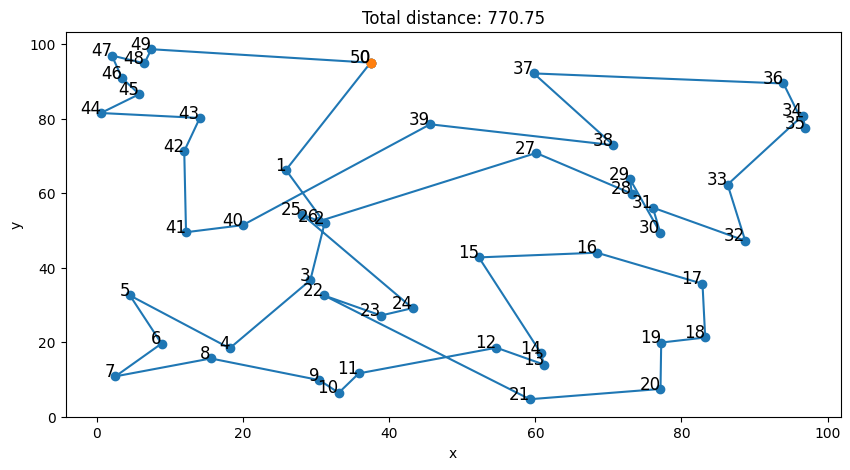

In [19]:
# ペナルティ行列
penalties = np.zeros((num_cities, num_cities))

# λの設定（ペナルティの影響度）
lambda_ = 0.1

# 2-opt + GLS
for i in range(1000):
    new_order = order.copy()
    # ランダムに反転させる区間を決定
    L = np.random.randint(1, num_cities)
    R = np.random.randint(L, num_cities)
    # 区間を反転
    new_order[L:R+1] = new_order[L:R+1][::-1]
    # 新しい解を評価
    new_total_distance = total_distance(cities, new_order)

    # GLSの評価関数
    new_gls_distance = gls_total_distance(
        cities, new_order, penalties, lambda_)

    # GLS評価関数が改善されるなら更新
    if new_gls_distance < current_total_distance:
        order = new_order
        current_total_distance = new_gls_distance

    # ペナルティの更新（一定回数ごとに）
    if i % 100 == 0:
        update_penalties(order, penalties)

visualize(cities, order, current_total_distance)